# Analiza cen akcji firm Mastercard, Visa oraz American Express (2010–2024)


## Cel projektu

Celem projektu jest analiza historycznych cen akcji firm **Mastercard**, **Visa** oraz **American Express** w latach **2010–2024** oraz zbadanie zależności pomiędzy ceną akcji a wolumenem obrotu. Na podstawie uzyskanych wyników zostanie przeprowadzona prognoza przyszłych cen akcji oraz ich porównanie.


## Pytania badawcze

- Jak zmieniała się cena akcji analizowanych firm w latach 2010–2024?
- Czy ceny akcji Mastercard, Visa oraz American Express są ze sobą skorelowane?
- Czy wolumen obrotu wpływa na cenę akcji, czy też cena akcji wpływa na wolumen?

Na tej podstawie zamierzam przeprowadzić prognozę dla cen akcji tych trzech firm oraz przeporwadzić wyniki.

## Założenia:

- Firmy te będą regować w podobny sposób na kryzysy w latach 2010-2024, a wartość akcji będzie proporcjonalna w stosunku do firmy konkurnecyjnej. 
- Większa firma wpływa na mniejsze 
- Zmniejszenie liczby kupna wlumenów w trakcie kryzysu

## Uzasadnienie 
- Zagadnienie ma charakter uniwersalny – mechanizmy rynku akcji są podobne niezależnie od analizowanej spółki.
- Mastercard, Visa oraz American Express to międzynarodowe korporacje silnie powiązane z gospodarką USA.
- Okres pandemii COVID-19 mógł wpłynąć na ceny akcji tych firm w sposób odmienny niż w przypadku wielu innych sektorów.
- Mastercard i Visa są powszechnie używane również w Polsce, co czyni analizę bardziej praktyczną i zrozumiałą.


## Przygotowanie Projektu

### Wczytywanie bibliotek 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import sklearn.preprocessing as preprocessing
from sklearn.metrics import matthews_corrcoef
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose


### Ładowanie danych

In [2]:
df = pd.read_csv('MVR.csv')
df_2 = pd.read_csv('AXP_stock_data.csv')

## Statystyka opisowa 

### Visa i Mastercard

In [3]:
print(df.info())
print(df.describe().T)
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   str    
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), str(1)
memory usage: 411.2 KB
None
              count          mean           std           min           25%  \
Open_M       4047.0  1.645356e+02  1.386205e+02  1.210000e+01  4.245950e+01   
High_M       4047.0  1.661701e+02  1.399460e+02  1

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


### American Express

In [4]:
print(df_2.info())
print(df_2.describe().T)
df_2.head()

<class 'pandas.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4012 non-null   str    
 1   Open               4012 non-null   float64
 2   High               4012 non-null   float64
 3   Low                4012 non-null   float64
 4   Close              4012 non-null   float64
 5   Volume             4012 non-null   int64  
 6   Dividends          4012 non-null   float64
 7   Stock Splits       4012 non-null   float64
 8   Daily_Return       4011 non-null   float64
 9   Cumulative_Return  4011 non-null   float64
 10  MA_50              3963 non-null   float64
 11  MA_200             3813 non-null   float64
dtypes: float64(10), int64(1), str(1)
memory usage: 376.3 KB
None
                    count          mean           std            min  \
Open               4012.0  1.094256e+02  7.443519e+01      29.780785   
High               401

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-04 00:00:00-05:00,32.467961,32.698679,32.133812,32.555473,6894300,0.00,0.0,NaN,NaN,NaN,NaN
1,2010-01-05 00:00:00-05:00,32.483875,32.802109,32.117902,32.483875,10641200,0.00,0.0,-0.002199,-0.002199,NaN,NaN
2,2010-01-06 00:00:00-05:00,32.802106,33.152164,32.754370,33.008961,8399400,0.00,0.0,0.016164,0.013930,NaN,NaN
3,2010-01-07 00:00:00-05:00,32.969006,33.752083,32.849150,33.544327,8981700,0.18,0.0,0.016219,0.030374,NaN,NaN
4,2010-01-08 00:00:00-05:00,33.368525,33.943846,33.080868,33.520348,7907700,0.00,0.0,-0.000715,0.029638,NaN,NaN


## Data Processing

### Zamiana Daty na format datetime

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df_2['Date'] = pd.to_datetime(df_2['Date'], utc=True).dt.tz_localize(None).dt.normalize()

In [6]:
df_2['Date'].info()

<class 'pandas.Series'>
RangeIndex: 4012 entries, 0 to 4011
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
4012 non-null   datetime64[us]
dtypes: datetime64[us](1)
memory usage: 31.5 KB


### Usuwanie wartości NA - nie trzeba

In [7]:
print(df.isna().sum())
print(df_2.isna().sum())

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Dividends              0
Stock Splits           0
Daily_Return           1
Cumulative_Return      1
MA_50                 49
MA_200               199
dtype: int64


### Połączenie Datasetów na podstawie kolumny 'Date':

In [8]:
#Połączenie Datasetów na podstawie kolumny 'Date':
merged_df = pd.merge(df, df_2, on='Date', how='inner')
print(merged_df.info())
merged_df.head()

<class 'pandas.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3646 non-null   datetime64[us]
 1   Open_M             3646 non-null   float64       
 2   High_M             3646 non-null   float64       
 3   Low_M              3646 non-null   float64       
 4   Close_M            3646 non-null   float64       
 5   Adj Close_M        3646 non-null   float64       
 6   Volume_M           3646 non-null   int64         
 7   Open_V             3646 non-null   float64       
 8   High_V             3646 non-null   float64       
 9   Low_V              3646 non-null   float64       
 10  Close_V            3646 non-null   float64       
 11  Adj Close_V        3646 non-null   float64       
 12  Volume_V           3646 non-null   int64         
 13  Open               3646 non-null   float64       
 14  High               

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,...,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-04,25.799000,25.820000,25.607,25.684000,23.820490,9321000,22.000000,22.192499,21.865000,...,32.698679,32.133812,32.555473,6894300,0.00,0.0,NaN,NaN,NaN,NaN
1,2010-01-05,25.784000,25.796000,25.305,25.608000,23.749996,12906000,21.825001,21.882500,21.500000,...,32.802109,32.117902,32.483875,10641200,0.00,0.0,-0.002199,-0.002199,NaN,NaN
2,2010-01-06,25.624001,25.624001,25.250,25.556000,23.715660,10785000,21.752501,21.770000,21.475000,...,33.152164,32.754370,33.008961,8399400,0.00,0.0,0.016164,0.013930,NaN,NaN
3,2010-01-07,25.340000,25.406000,25.098,25.389000,23.560688,11273000,21.492500,21.750000,21.387501,...,33.752083,32.849150,33.544327,8981700,0.18,0.0,0.016219,0.030374,NaN,NaN
4,2010-01-08,25.233000,25.492001,25.170,25.398001,23.569046,8635000,21.705000,21.847500,21.557501,...,33.943846,33.080868,33.520348,7907700,0.00,0.0,-0.000715,0.029638,NaN,NaN


### Zmiana nazewnictwa kolumn

In [9]:
merged_df.rename(columns={'Open':'Open_AE', 'High':'High_AE', 'Low':'Low_AE', 'Close':'Close_AE', 'Adj Close':'Adj_Close_AE', 'Volume':'Volume_AE'}, inplace=True)
merged_df.columns

Index(['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Adj Close_M',
       'Volume_M', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Adj Close_V',
       'Volume_V', 'Open_AE', 'High_AE', 'Low_AE', 'Close_AE', 'Volume_AE',
       'Dividends', 'Stock Splits', 'Daily_Return', 'Cumulative_Return',
       'MA_50', 'MA_200'],
      dtype='str')

### Stworzenie Datasetu miesięcznego 

In [10]:
df_monthly = merged_df.set_index('Date').resample('ME').last().reset_index()
df_monthly.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,...,High_AE,Low_AE,Close_AE,Volume_AE,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-31,25.115999,25.514000,24.909000,24.990000,23.190432,15042000,20.650000,21.245001,20.467501,...,30.979355,29.852688,30.092403,14219900,0.0,0.0,0.006145,-0.075658,NaN,NaN
1,2010-02-28,22.298000,22.514000,22.106001,22.437000,20.821272,10947000,21.395000,21.430000,21.254999,...,30.619787,30.172315,30.515909,6475500,0.0,0.0,0.003943,-0.062649,NaN,NaN
2,2010-03-31,25.219999,25.427999,25.142000,25.400000,23.570902,9333000,22.674999,23.049999,22.629999,...,33.385568,32.767617,33.112705,6882700,0.0,0.0,-0.000727,0.017116,31.476368,NaN
3,2010-04-30,25.721001,25.740000,24.599001,24.804001,23.031168,16675000,23.320000,23.342501,22.504999,...,38.545878,36.756219,37.013031,14019700,0.0,0.0,-0.031092,0.136922,33.776104,NaN
4,2010-05-31,20.737000,20.823999,20.115000,20.177000,18.734877,25471000,18.342501,18.375000,18.000000,...,32.671299,31.740356,31.997168,12494000,0.0,0.0,-0.011406,-0.017149,34.514117,NaN


### Dataset dla close 

In [11]:
df_close = df_monthly[['Date', 'Close_M', 'Close_V', 'Close_AE']].copy()
df_close.head()

,Date,Close_M,Close_V,Close_AE
0,2010-01-31,24.990000,20.507500,30.092403
1,2010-02-28,22.437000,21.320000,30.515909
2,2010-03-31,25.400000,22.757500,33.112705
3,2010-04-30,24.804001,22.557501,37.013031
4,2010-05-31,20.177000,18.115000,31.997168


### Dataset dla volume

In [12]:
df_volume = df_monthly[['Date', 'Volume_M', 'Volume_V', 'Volume_AE']].copy()
df_volume.head()

,Date,Volume_M,Volume_V,Volume_AE
0,2010-01-31,15042000,20281600,14219900
1,2010-02-28,10947000,12476400,6475500
2,2010-03-31,9333000,12504400,6882700
3,2010-04-30,16675000,25059600,14019700
4,2010-05-31,25471000,26581200,12494000


### Wyłączenie trzech datasetów 

Dla każdej z firm - ułatwi to dalszą analizę EDA i operacje na każdej z firm. Doda to więcej kroków do analizy (>3x), ale zagwarantuje rozdzielność danych

In [13]:
#Mastercard 
df_m = df_monthly[['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Volume_M']].copy()
#Visa
df_v = df_monthly[['Date', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Volume_V']].copy()
#American Express
df_ae = df_monthly[['Date', 'Open_AE', 'High_AE', 'Low_AE', 'Close_AE', 'Volume_AE']].copy()

### Standaryzacja wartości kupionych volumenów -  dla późniejszego modelu predykcji.

In [14]:
df_m['Volume_M_log'] = np.log1p(df_m['Volume_M'])  # log(1 + x) żeby uniknąć log(0)
df_v['Volume_V_log'] = np.log1p(df_v['Volume_V'])
df_ae['Volume_AE_log'] = np.log1p(df_ae['Volume_AE'])


In [15]:
df_m .head()

,Date,Open_M,High_M,Low_M,Close_M,Volume_M,Volume_M_log
0,2010-01-31,25.115999,25.514000,24.909000,24.990000,15042000,16.526357
1,2010-02-28,22.298000,22.514000,22.106001,22.437000,10947000,16.208576
2,2010-03-31,25.219999,25.427999,25.142000,25.400000,9333000,16.049067
3,2010-04-30,25.721001,25.740000,24.599001,24.804001,16675000,16.629421
4,2010-05-31,20.737000,20.823999,20.115000,20.177000,25471000,17.053051


### Sumowanie danych dla każdego miesiąca.

 Poprawi to przejżystość danych, przy jednoczesnym zachowaniu poprawności danych

In [16]:
print('Mastercard monthly data:')
print(df_m.head())
print('Visa monthly data:')
print(df_v.head())
print('American Express monthly data:')
print(df_ae.head())

Mastercard monthly data:
        Date     Open_M     High_M      Low_M    Close_M  Volume_M  \
0 2010-01-31  25.115999  25.514000  24.909000  24.990000  15042000   
1 2010-02-28  22.298000  22.514000  22.106001  22.437000  10947000   
2 2010-03-31  25.219999  25.427999  25.142000  25.400000   9333000   
3 2010-04-30  25.721001  25.740000  24.599001  24.804001  16675000   
4 2010-05-31  20.737000  20.823999  20.115000  20.177000  25471000   

   Volume_M_log  
0     16.526357  
1     16.208576  
2     16.049067  
3     16.629421  
4     17.053051  
Visa monthly data:
        Date     Open_V     High_V      Low_V    Close_V  Volume_V  \
0 2010-01-31  20.650000  21.245001  20.467501  20.507500  20281600   
1 2010-02-28  21.395000  21.430000  21.254999  21.320000  12476400   
2 2010-03-31  22.674999  23.049999  22.629999  22.757500  12504400   
3 2010-04-30  23.320000  23.342501  22.504999  22.557501  25059600   
4 2010-05-31  18.342501  18.375000  18.000000  18.115000  26581200   

   Vol

## EDA

### Porównanie cen akcji wszytskich firm

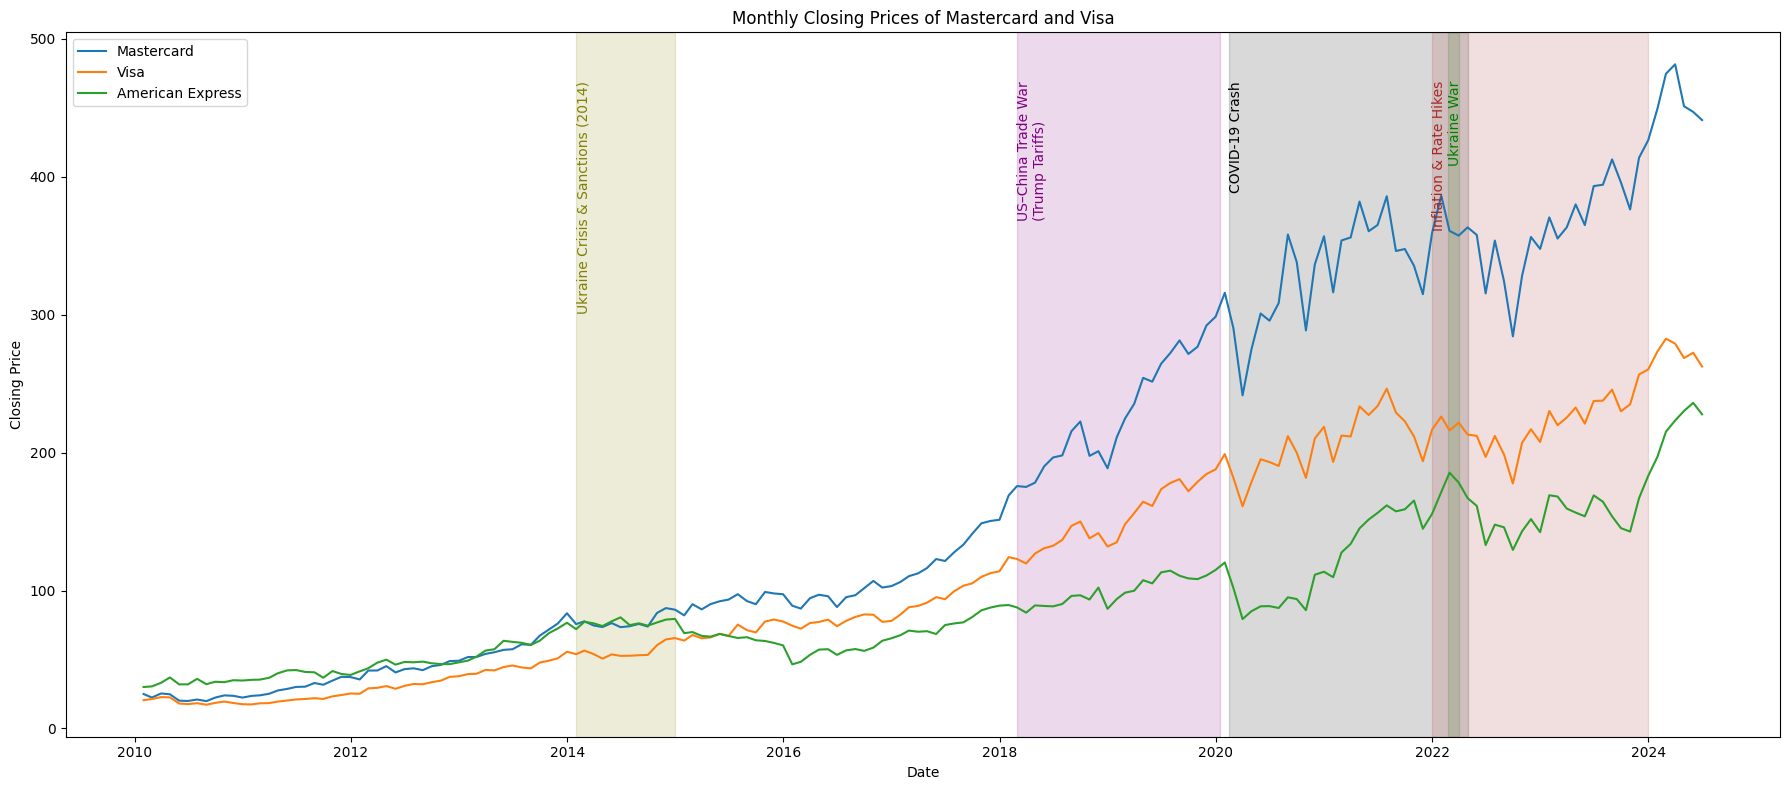

In [17]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Mastercard and Visa and American Express
ax1.plot(df_m['Date'], df_m['Close_M'], label='Mastercard')
ax1.plot(df_v['Date'], df_v['Close_V'], label='Visa')
ax1.plot(df_ae['Date'], df_ae['Close_AE'], label='American Express')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('Monthly Closing Prices of Mastercard and Visa')


event_periods = [
    ("2014-02-01", "2014-12-31", "Ukraine Crisis & Sanctions (2014)", "olive"),
    ("2018-03-01", "2020-01-15", "US–China Trade War\n(Trump Tariffs)", "purple"),
    ("2020-02-15", "2022-04-30", "COVID-19 Crash", "black"),
    ("2022-02-24", "2022-03-31", "Ukraine War", "green"),
    ("2022-01-01", "2023-12-31", "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(start_dt, end_dt, color=color, alpha=0.15)
    ax1.text(start_dt, ax1.get_ylim()[1]*0.93, label,
             rotation=90, verticalalignment='top',
             fontsize=10, color=color)

ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()


 Widać, że pierwsze przewidywania były poprawne. Mastercard, Visa oraz American Express mają proporcojonalne ceny akcji względem siebie, a ich cena waha sie podobnie w zalezności od czasu. Co naturlne u Mastercarda widac większe wahania cen niż u innych. Większe ceny = większe wahania. 

W perpsektywie lat 2008 - 2024 widać trend rosnący wszystkich trzech  firm z pewnymi fluktuacjami (Szczególnie po 2020 roku.)
W latch 2008- 2019 fluktuacje te były znacznie mniej widoczne u obu firm. Jest to zrozumiałe, ponieważ ceny akcji są wyższe, jednak muszą być równiez inne czynniki 

Można zauwazyć, że po zaraz po rozpoczęciu pandemi Covid-19 oraz problemu inflacyjnego w USA + rozpoczęcie wojny w Ukrainie, akcje mocno spadają, a następnie ponownie rosną pomimo dalej trwającego kryzysu. Podczas pandemiii można to argumentować chwilową paniką oraz zamrożeniem giełdy, a następnie wzrost ceny ze względu na znaczny rozwój płatności internetowych przy równoczesnym ograniczeniu gotówki

Poza trendem nie widać sezoowości, ceny akcji tych firm są raczej spowodowane pewnymi impulsami. Należy zrobić test IRF
Widać cykliczność - spadek i wzrost ceny / 
Biały szum -  nalezy zrobić test autokorelacji, ale raczej tak (charakterystyka giełdy)

Dane nie są stacjonarne

Do zrobienia:
    - Analiza IRF (opcjonalnie)
    - Zbadać autokorelacje
    - Matryca korelacji 

### Porównanie akcji Mastercard i kupionych volumnenów (suma miesięczna)

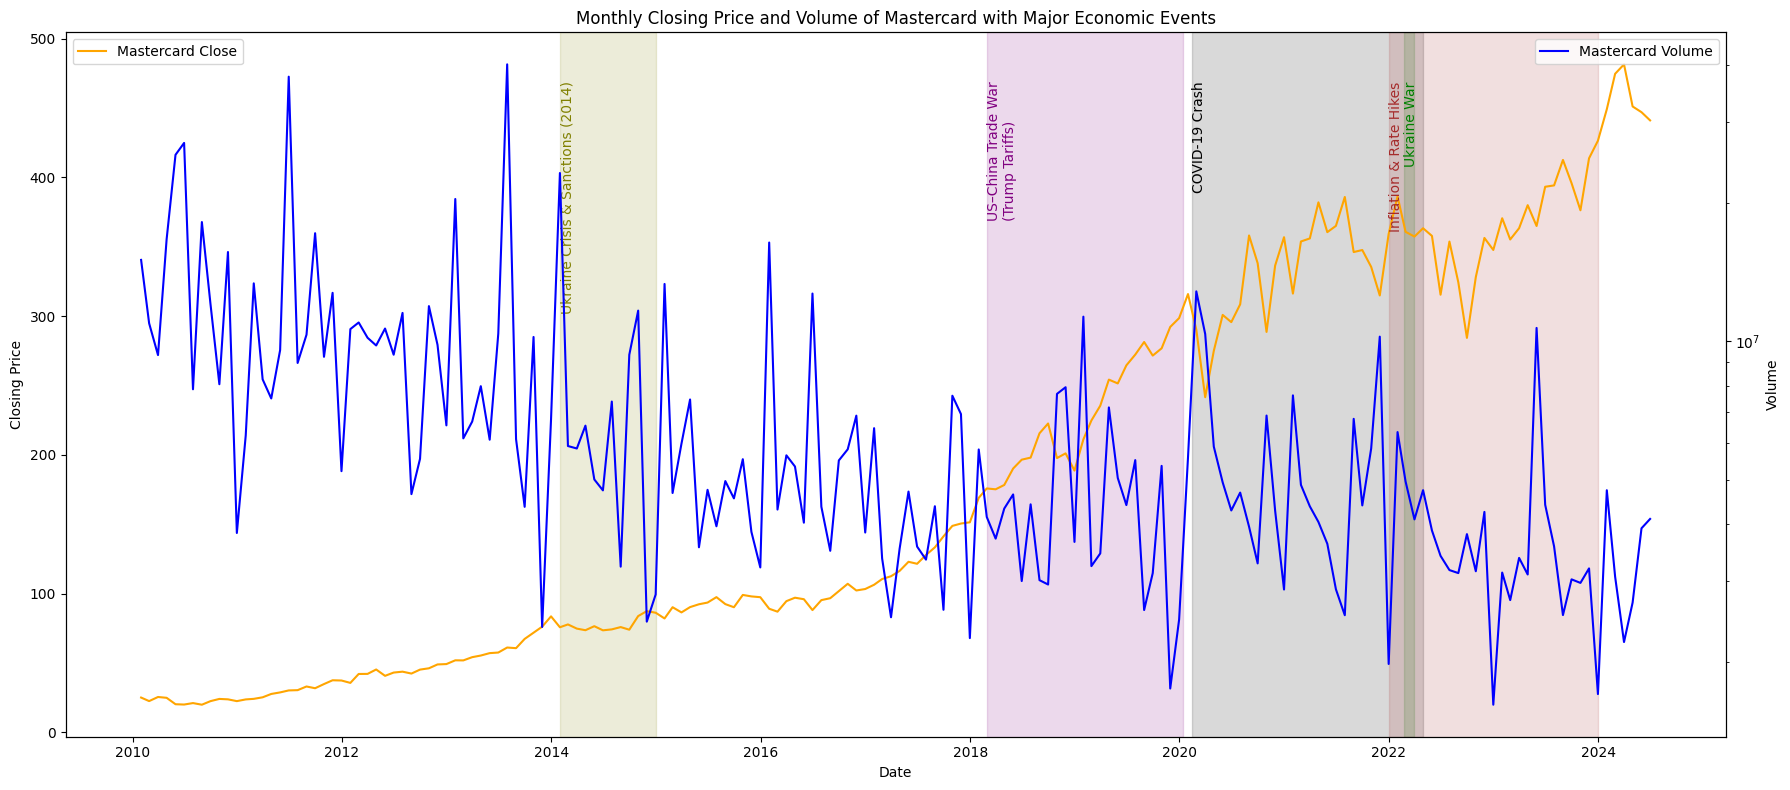

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_m['Date'],
    df_m['Close_M'],
    label='Mastercard Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')

ax2 = ax1.twinx()
ax2.plot(
    df_m['Date'],
    df_m['Volume_M'],
    label='Mastercard Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Mastercard with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Widac wyraźny sapdek ilości kupionych volumenów wraz z czasem - trend ujemny. Może to być spowodowane zainsteresowaniem kupujących - na rynku wraz z czasem na giełdzie pojawia się więcej firm z bardziej obiecującymi zyskami.
Widać również pewną zależność w kupowaniu wolumenów - wzrost oraz spadek bezpośrednio w kolejnych miesiącach. Widać jednak pewne zachowania możliwe, że spowodowane opisanymi na wykresie kryzysami. Na początku każdego kryzysu jest widoczny znaczny spadek ilości kupionych akcji. Po upływie paru miesięcy, kiedy cena akcji spadła, a sytuacja geopolityczna się unormowała widać ponowny popyt.

Czy istnieje korelacja albo przyczynowość - test Grangera

### Porównanie akcji Visa i kupionych volumnenów (suma miesięczna)

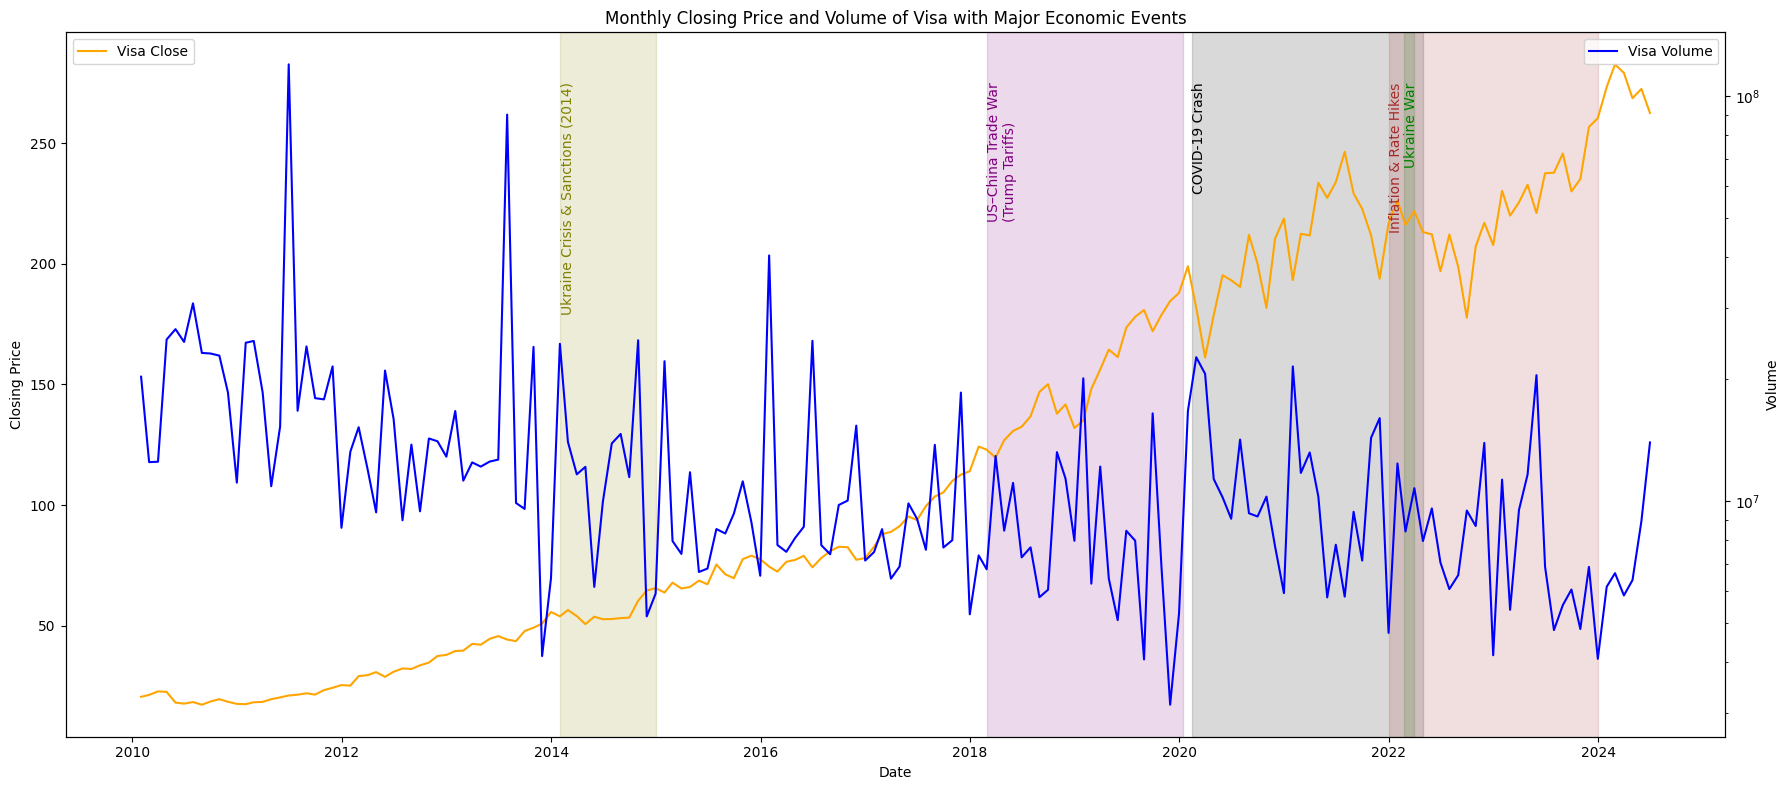

In [19]:
fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_v['Date'],
    df_v['Close_V'],
    label='Visa Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')


ax2 = ax1.twinx()
ax2.plot(
    df_v['Date'],
    df_v['Volume_V'],
    label='Visa Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Visa with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Te same wnioski co z poprzednim wykresem

### Porównanie akcji American Express i kupionych volumnenów (suma miesięczna)

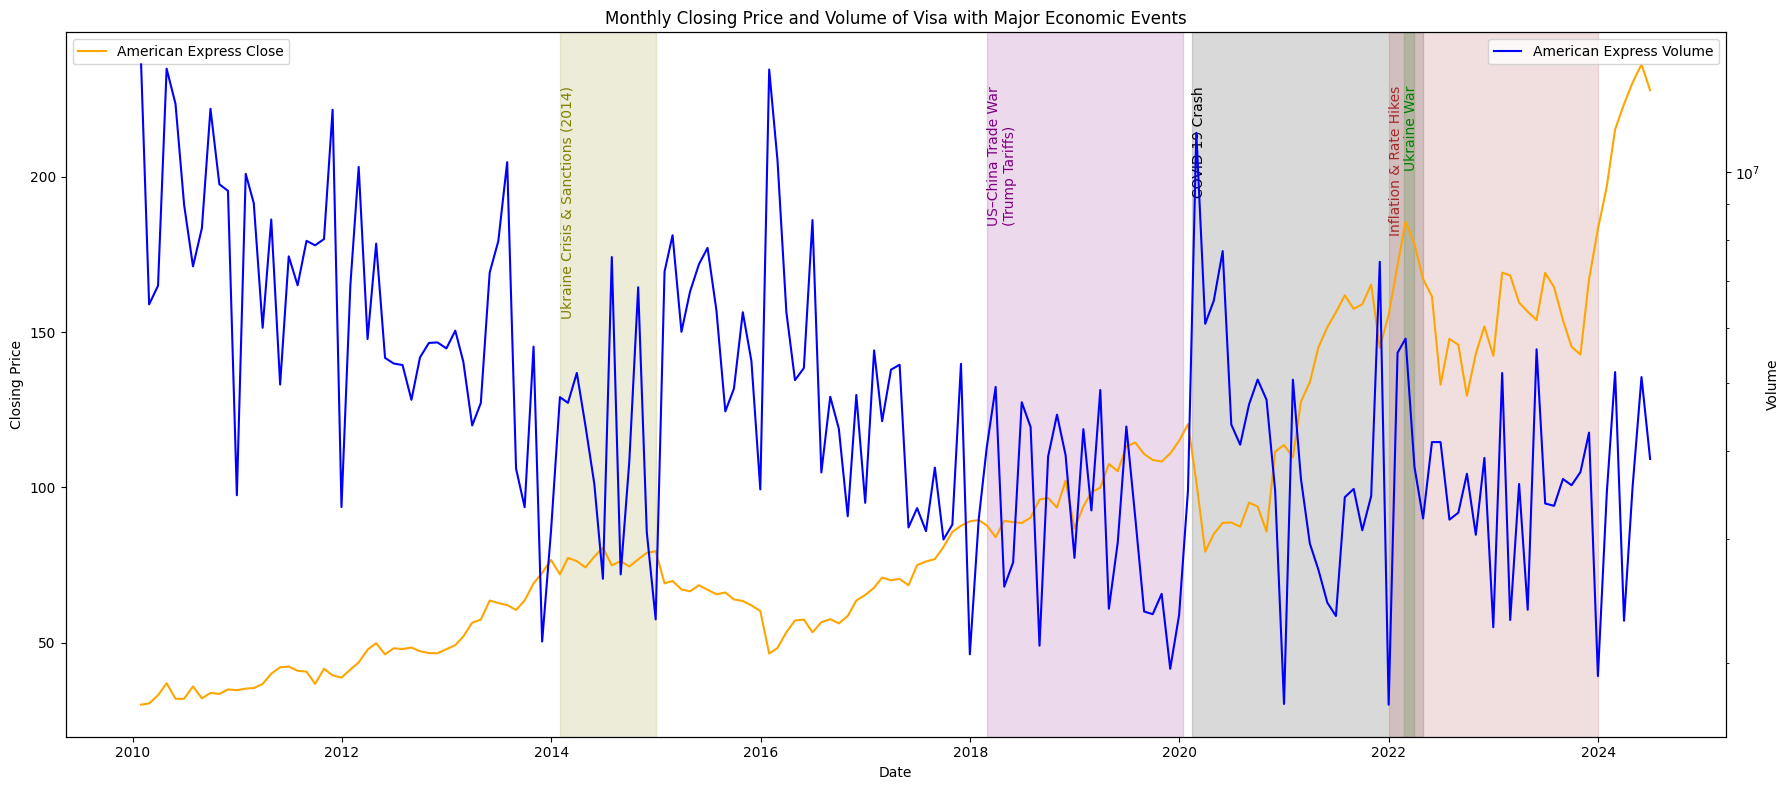

In [20]:
fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_ae['Date'],
    df_ae['Close_AE'],
    label='American Express Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')


ax2 = ax1.twinx()
ax2.plot(
    df_ae['Date'],
    df_ae['Volume_AE'],
    label='American Express Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Visa with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Porównanie ilości sprzedancyh wolumenów dla wszystkich firm 

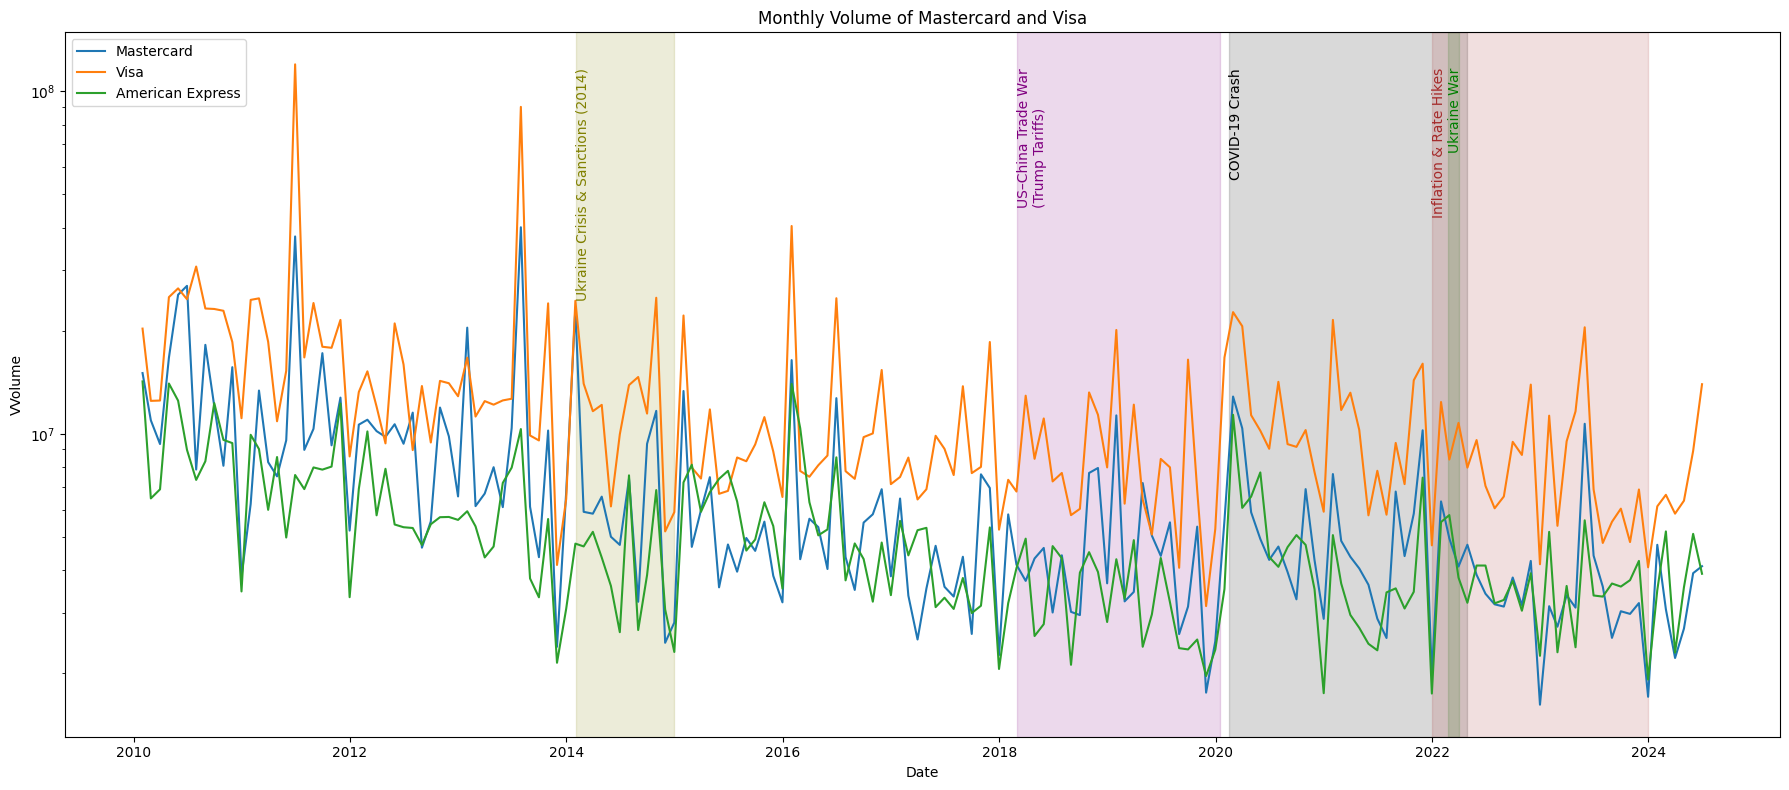

In [21]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Mastercard and Visa and American Express
ax1.plot(df_m['Date'], df_m['Volume_M'], label='Mastercard')
ax1.plot(df_v['Date'], df_v['Volume_V'], label='Visa')
ax1.plot(df_ae['Date'], df_ae['Volume_AE'], label='American Express')
ax1.set_xlabel('Date')
ax1.set_ylabel('VVolume')
ax1.set_title('Monthly Volume of Mastercard and Visa')


event_periods = [
    ("2014-02-01", "2014-12-31", "Ukraine Crisis & Sanctions (2014)", "olive"),
    ("2018-03-01", "2020-01-15", "US–China Trade War\n(Trump Tariffs)", "purple"),
    ("2020-02-15", "2022-04-30", "COVID-19 Crash", "black"),
    ("2022-02-24", "2022-03-31", "Ukraine War", "green"),
    ("2022-01-01", "2023-12-31", "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(start_dt, end_dt, color=color, alpha=0.15)
    ax1.text(start_dt, ax1.get_ylim()[1]*0.93, label,
             rotation=90, verticalalignment='top',
             fontsize=10, color=color)

ax1.legend(loc='upper left')
ax1.set_yscale('log')
plt.tight_layout()
plt.show()


Liczba kupowanych akcji jest dosyć proporcjonalna dla trzech omawianych firm. Można wnioskować, że moga one pokazywać ogólne wahania sprzedaży akcji dla banków /firmtransakcyjnych

### Macież korelacji

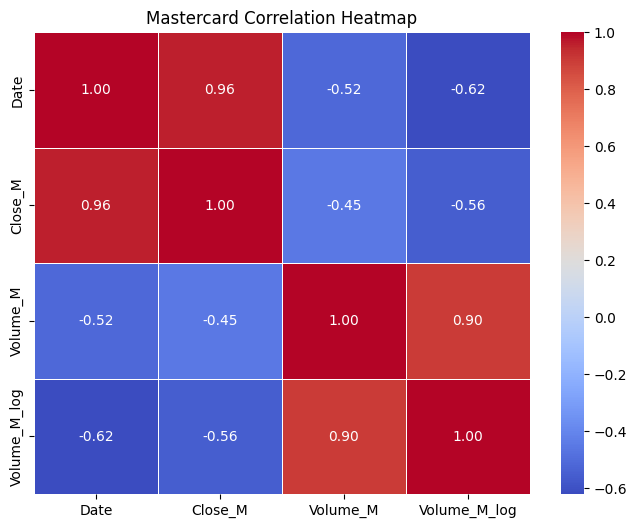

In [22]:
# Mastercard
matrix = df_m.drop(columns=['Open_M', 'Low_M','High_M']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mastercard Correlation Heatmap")
plt.show()

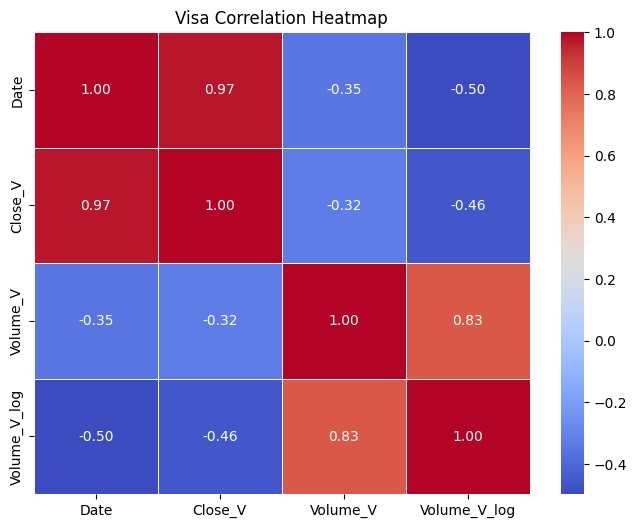

In [23]:
#Visa
matrix = df_v.drop(columns=['Open_V', 'Low_V','High_V']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Visa Correlation Heatmap")
plt.show()

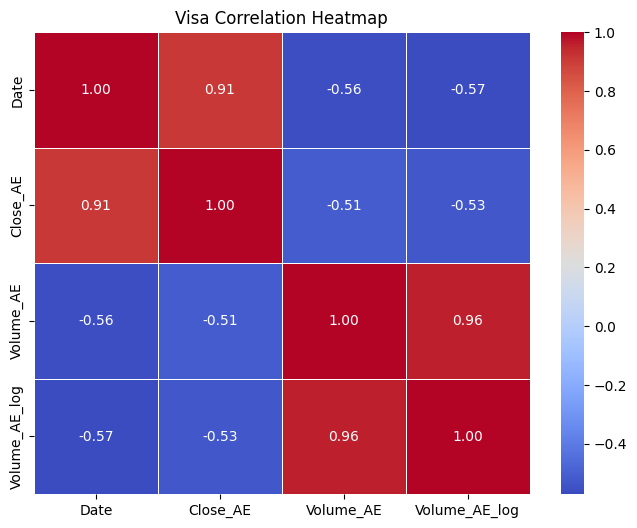

In [24]:
matrix = df_ae.drop(columns=['Open_AE', 'Low_AE','High_AE',]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Visa Correlation Heatmap")
plt.show()

Widać silne lub umiarkowne korelacje dla każdego z czynników. 
Przede wszytskim widać bardzo silną korelację czasu i ceny zamknięcia akcji co jest podstawą szeregów czasowych - trend rosnący
 - Obrót wolumenów koreluje ujemnie z ceną akcji w widocznym stopniu. Kiedy cena akcji jest wysoka, to spada ilośc kupionych wolumenów i odwrotnie
 - Widać równiez ujemną korelację dla wolumenóœ i daty co mówi nam o trendzie malejącym

## Testy

### Test stacjonarności, Test Dickeya Fullera 

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, label, alpha=0.05):
    """
    Wykonuje test ADF i wypisuje czytelne wyniki.
    """
    stat, p_value, _, _, critical_values, _ = adfuller(series.dropna())

    print("=" * 60)
    print(f"ADF TEST | {label}")
    print("=" * 60)
    print(f"Statystyka testowa: {stat:.4f}")
    print(f"p-value:            {p_value:.4f}")

    if p_value < alpha:
        print("Wniosek: STACJONARNY (odrzucamy H0)")
    else:
        print("Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)")

    print("Wartości krytyczne:")
    for key, value in critical_values.items():
        print(f"  {key}: {value:.4f}")

    print("\n")


In [26]:
# CENY
adf_test(df_m["Close_M"], "Mastercard – Close")
adf_test(df_v["Close_V"], "Visa – Close")


ADF TEST | Mastercard – Close
Statystyka testowa: 1.1658
p-value:            0.9957
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4704
  5%: -2.8791
  10%: -2.5761


ADF TEST | Visa – Close
Statystyka testowa: 0.5057
p-value:            0.9850
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4722
  5%: -2.8799
  10%: -2.5766




In [27]:
# Ceny American Express
adf_test(df_ae["Close_AE"], "American Express – Close")

ADF TEST | American Express – Close
Statystyka testowa: 0.6582
p-value:            0.9890
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4711
  5%: -2.8794
  10%: -2.5763




In [28]:
# WOLUMEN
adf_test(df_m["Volume_M"], "Mastercard – Volume")
adf_test(df_v["Volume_V"], "Visa – Volume")

ADF TEST | Mastercard – Volume
Statystyka testowa: -1.6850
p-value:            0.4389
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4719
  5%: -2.8798
  10%: -2.5765


ADF TEST | Visa – Volume
Statystyka testowa: -11.7536
p-value:            0.0000
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4687
  5%: -2.8784
  10%: -2.5758




In [29]:
# Wolumen American Express
adf_test(df_ae["Volume_AE"], "American Express – Volume")

ADF TEST | American Express – Volume
Statystyka testowa: -2.3753
p-value:            0.1488
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4714
  5%: -2.8796
  10%: -2.5764




### Test przyczynowości Gringera

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")

def granger_test(
    df,
    date_col,
    y_col,
    x_col,
    label,
    max_lag=5,
    alpha=0.05
):
    """
    Testuje: X → Y (czy x Granger-powoduje y)
    """

    data = (
        df[[date_col, y_col, x_col]]
        .dropna()
        .set_index(date_col)
    )

    print("=" * 75)
    print(f"GRANGER: {x_col} → {y_col} | {label.upper()}")
    print("=" * 75)
    print(f"H0: {x_col} NIE powoduje {y_col} w sensie Grangera")
    print(f"H1: {x_col} powoduje {y_col} w sensie Grangera")
    print("-" * 75)

    results = grangercausalitytests(
        data[[y_col, x_col]],
        maxlag=max_lag,
        verbose=False
    )

    for lag in range(1, max_lag + 1):
        f_stat, p_value = results[lag][0]['ssr_ftest'][:2]
        decision = "ISTOTNE" if p_value < alpha else "NIEISTOTNE"
        print(f"Lag {lag}: F = {f_stat:.4f}, p = {p_value:.4f} → {decision}")
    print("\n")

In [31]:
# Cena Mastercard → Cena Visa
granger_test(df_monthly, 'Date', 'Close_V', 'Close_M', 'Mastercard → Visa (Close)')
granger_test(df_monthly, 'Date', 'Close_M', 'Close_V', 'Visa → Mastercard (Close)')

GRANGER: Close_M → Close_V | MASTERCARD → VISA (CLOSE)
H0: Close_M NIE powoduje Close_V w sensie Grangera
H1: Close_M powoduje Close_V w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 0.8651, p = 0.3536 → NIEISTOTNE
Lag 2: F = 2.2677, p = 0.1067 → NIEISTOTNE
Lag 3: F = 0.9899, p = 0.3991 → NIEISTOTNE
Lag 4: F = 1.6603, p = 0.1618 → NIEISTOTNE
Lag 5: F = 1.8388, p = 0.1083 → NIEISTOTNE


GRANGER: Close_V → Close_M | VISA → MASTERCARD (CLOSE)
H0: Close_V NIE powoduje Close_M w sensie Grangera
H1: Close_V powoduje Close_M w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 4.8873, p = 0.0284 → ISTOTNE
Lag 2: F = 2.8442, p = 0.0610 → NIEISTOTNE
Lag 3: F = 0.9869, p = 0.4005 → NIEISTOTNE
Lag 4: F = 1.3420, p = 0.2566 → NIEISTOTNE
Lag 5: F = 1.4262, p = 0.2176 → NIEISTOTNE




In [32]:
# Cena American Express → Cena Visa
granger_test(df_monthly, 'Date', 'Close_V', 'Close_AE', 'American Express → Visa (Close)')
granger_test(df_monthly, 'Date', 'Close_AE', 'Close_V', 'Visa → American Express (Close)')


GRANGER: Close_AE → Close_V | AMERICAN EXPRESS → VISA (CLOSE)
H0: Close_AE NIE powoduje Close_V w sensie Grangera
H1: Close_AE powoduje Close_V w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 2.5839, p = 0.1098 → NIEISTOTNE
Lag 2: F = 1.7269, p = 0.1810 → NIEISTOTNE
Lag 3: F = 1.9579, p = 0.1224 → NIEISTOTNE
Lag 4: F = 1.3029, p = 0.2712 → NIEISTOTNE
Lag 5: F = 2.2815, p = 0.0491 → ISTOTNE


GRANGER: Close_V → Close_AE | VISA → AMERICAN EXPRESS (CLOSE)
H0: Close_V NIE powoduje Close_AE w sensie Grangera
H1: Close_V powoduje Close_AE w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 3.5136, p = 0.0626 → NIEISTOTNE
Lag 2: F = 2.5338, p = 0.0824 → NIEISTOTNE
Lag 3: F = 3.1155, p = 0.0278 → ISTOTNE
Lag 4: F = 2.3348, p = 0.0578 → NIEISTOTNE
Lag 5: F = 1.6775, p = 0.1430 → NIEISTOTNE




In [33]:
# Cena American Express → Cena Mastercard
granger_test(df_monthly, 'Date', 'Close_M', 'Close_AE', 'American Express → Mastercard (Close)')
granger_test(df_monthly, 'Date', 'Close_AE', 'Close_M', 'Mastercard → American Express (Close)')

GRANGER: Close_AE → Close_M | AMERICAN EXPRESS → MASTERCARD (CLOSE)
H0: Close_AE NIE powoduje Close_M w sensie Grangera
H1: Close_AE powoduje Close_M w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 1.4970, p = 0.2228 → NIEISTOTNE
Lag 2: F = 1.2601, p = 0.2863 → NIEISTOTNE
Lag 3: F = 2.8603, p = 0.0386 → ISTOTNE
Lag 4: F = 2.1036, p = 0.0828 → NIEISTOTNE
Lag 5: F = 2.5618, p = 0.0293 → ISTOTNE


GRANGER: Close_M → Close_AE | MASTERCARD → AMERICAN EXPRESS (CLOSE)
H0: Close_M NIE powoduje Close_AE w sensie Grangera
H1: Close_M powoduje Close_AE w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 4.1495, p = 0.0432 → ISTOTNE
Lag 2: F = 3.6649, p = 0.0277 → ISTOTNE
Lag 3: F = 3.5602, p = 0.0156 → ISTOTNE
Lag 4: F = 3.6903, p = 0.0067 → ISTOTNE
Lag 5: F = 2.6467, p = 0.0250 → ISTOTNE




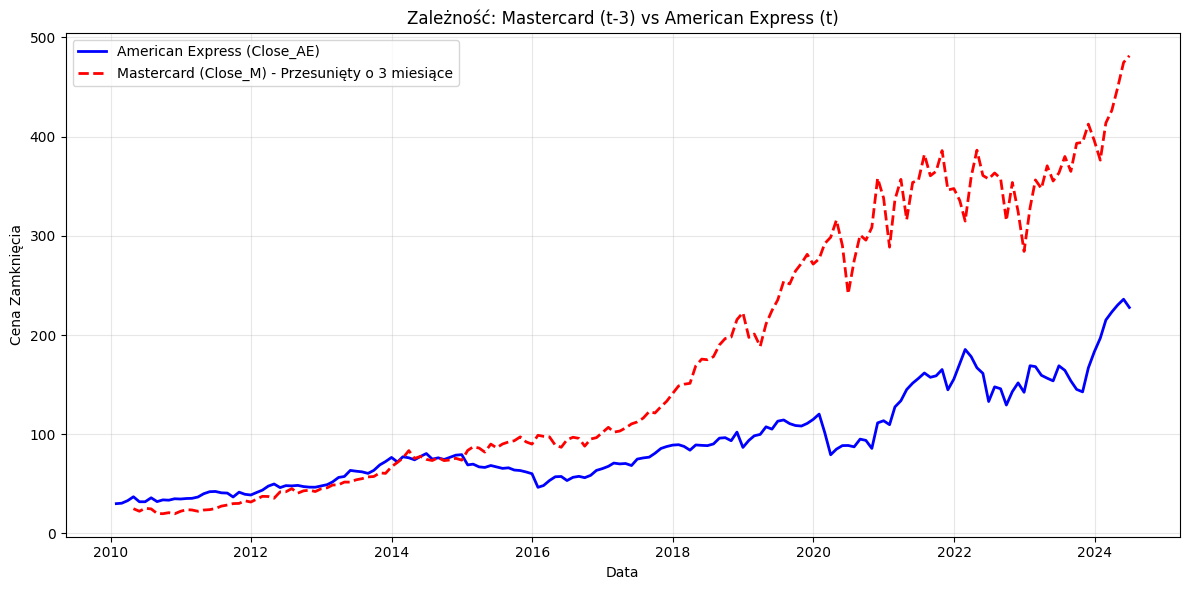

In [34]:
df_plot = df_monthly.copy()
df_plot['Close_M_shifted'] = df_plot['Close_M'].shift(3)


plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['Close_AE'], label='American Express (Close_AE)', color='blue', linewidth=2)
plt.plot(df_plot['Date'], df_plot['Close_M_shifted'], label='Mastercard (Close_M) - Przesunięty o 3 miesiące', 
         color='red', linestyle='--', linewidth=2)
plt.title('Zależność: Mastercard (t-3) vs American Express (t)')
plt.xlabel('Data')
plt.ylabel('Cena Zamknięcia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# Wolumen Mastercard → Wolumen Visa
granger_test(df_monthly, 'Date', 'Volume_V', 'Volume_M', 'Mastercard → Visa (Volume)')
granger_test(df_monthly, 'Date', 'Volume_M', 'Volume_V', 'Visa → Mastercard (Volume)')

GRANGER: Volume_M → Volume_V | MASTERCARD → VISA (VOLUME)
H0: Volume_M NIE powoduje Volume_V w sensie Grangera
H1: Volume_M powoduje Volume_V w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 7.1402, p = 0.0083 → ISTOTNE
Lag 2: F = 3.8658, p = 0.0228 → ISTOTNE
Lag 3: F = 2.7628, p = 0.0438 → ISTOTNE
Lag 4: F = 1.7349, p = 0.1448 → NIEISTOTNE
Lag 5: F = 1.3639, p = 0.2407 → NIEISTOTNE


GRANGER: Volume_V → Volume_M | VISA → MASTERCARD (VOLUME)
H0: Volume_V NIE powoduje Volume_M w sensie Grangera
H1: Volume_V powoduje Volume_M w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 2.3528, p = 0.1269 → NIEISTOTNE
Lag 2: F = 1.4571, p = 0.2358 → NIEISTOTNE
Lag 3: F = 0.9850, p = 0.4013 → NIEISTOTNE
Lag 4: F = 0.6204, p = 0.6486 → NIEISTOTNE
Lag 5: F = 0.6544, p = 0.6586 → NIEISTOTNE




In [36]:
# Wolumen → Cena
granger_test(df_monthly, 'Date', 'Close_M', 'Volume_M', 'Mastercard: Volume → Price')
granger_test(df_monthly, 'Date', 'Close_V', 'Volume_V', 'Visa: Volume → Price')

GRANGER: Volume_M → Close_M | MASTERCARD: VOLUME → PRICE
H0: Volume_M NIE powoduje Close_M w sensie Grangera
H1: Volume_M powoduje Close_M w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 0.0288, p = 0.8654 → NIEISTOTNE
Lag 2: F = 0.1304, p = 0.8778 → NIEISTOTNE
Lag 3: F = 0.1570, p = 0.9251 → NIEISTOTNE
Lag 4: F = 0.1342, p = 0.9696 → NIEISTOTNE
Lag 5: F = 0.1180, p = 0.9883 → NIEISTOTNE


GRANGER: Volume_V → Close_V | VISA: VOLUME → PRICE
H0: Volume_V NIE powoduje Close_V w sensie Grangera
H1: Volume_V powoduje Close_V w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 0.0745, p = 0.7852 → NIEISTOTNE
Lag 2: F = 0.2873, p = 0.7506 → NIEISTOTNE
Lag 3: F = 0.2494, p = 0.8617 → NIEISTOTNE
Lag 4: F = 0.2257, p = 0.9237 → NIEISTOTNE
Lag 5: F = 0.1552, p = 0.9782 → NIEISTOTNE




In [37]:
# Cena → Wolumen
granger_test(df_monthly, 'Date', 'Volume_M', 'Close_M', 'Mastercard: Price → Volume')
granger_test(df_monthly, 'Date', 'Volume_V', 'Close_V', 'Visa: Price → Volume')

GRANGER: Close_M → Volume_M | MASTERCARD: PRICE → VOLUME
H0: Close_M NIE powoduje Volume_M w sensie Grangera
H1: Close_M powoduje Volume_M w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 24.2900, p = 0.0000 → ISTOTNE
Lag 2: F = 9.7757, p = 0.0001 → ISTOTNE
Lag 3: F = 3.4350, p = 0.0184 → ISTOTNE
Lag 4: F = 2.5225, p = 0.0431 → ISTOTNE
Lag 5: F = 1.6875, p = 0.1406 → NIEISTOTNE


GRANGER: Close_V → Volume_V | VISA: PRICE → VOLUME
H0: Close_V NIE powoduje Volume_V w sensie Grangera
H1: Close_V powoduje Volume_V w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 15.6656, p = 0.0001 → ISTOTNE
Lag 2: F = 7.0443, p = 0.0012 → ISTOTNE
Lag 3: F = 3.5481, p = 0.0159 → ISTOTNE
Lag 4: F = 2.2792, p = 0.0631 → NIEISTOTNE
Lag 5: F = 1.4467, p = 0.2105 → NIEISTOTNE




In [38]:
# Wolumen American Express → Cena American Express
granger_test(df_monthly, 'Date', 'Close_AE', 'Volume_AE', 'American Express: Volume → Price')
# Cena American Express → Wolumen American Express
granger_test(df_monthly, 'Date', 'Volume_AE', 'Close_AE', 'American Express: Price → Volume')

GRANGER: Volume_AE → Close_AE | AMERICAN EXPRESS: VOLUME → PRICE
H0: Volume_AE NIE powoduje Close_AE w sensie Grangera
H1: Volume_AE powoduje Close_AE w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 0.9546, p = 0.3299 → NIEISTOTNE
Lag 2: F = 0.5840, p = 0.5588 → NIEISTOTNE
Lag 3: F = 0.3669, p = 0.7770 → NIEISTOTNE
Lag 4: F = 0.4022, p = 0.8069 → NIEISTOTNE
Lag 5: F = 0.3191, p = 0.9010 → NIEISTOTNE


GRANGER: Close_AE → Volume_AE | AMERICAN EXPRESS: PRICE → VOLUME
H0: Close_AE NIE powoduje Volume_AE w sensie Grangera
H1: Close_AE powoduje Volume_AE w sensie Grangera
---------------------------------------------------------------------------
Lag 1: F = 19.1040, p = 0.0000 → ISTOTNE
Lag 2: F = 5.9653, p = 0.0031 → ISTOTNE
Lag 3: F = 1.6058, p = 0.1900 → NIEISTOTNE
Lag 4: F = 0.9106, p = 0.4593 → NIEISTOTNE
Lag 5: F = 0.9641, p = 0.4416 → NIEISTOTNE




## Dekompozycja danych

In [39]:
result_ae = seasonal_decompose(df_monthly['Close_AE'], model='additive', period=12)
result_m = seasonal_decompose(df_monthly['Close_M'], model='additive', period=12)
results_v = seasonal_decompose(df_monthly['Close_V'], model='additive', period=12)
residuals_ae = result_ae.resid.dropna()
residuals_m = result_m.resid.dropna()
residuals_v = results_v.resid.dropna()

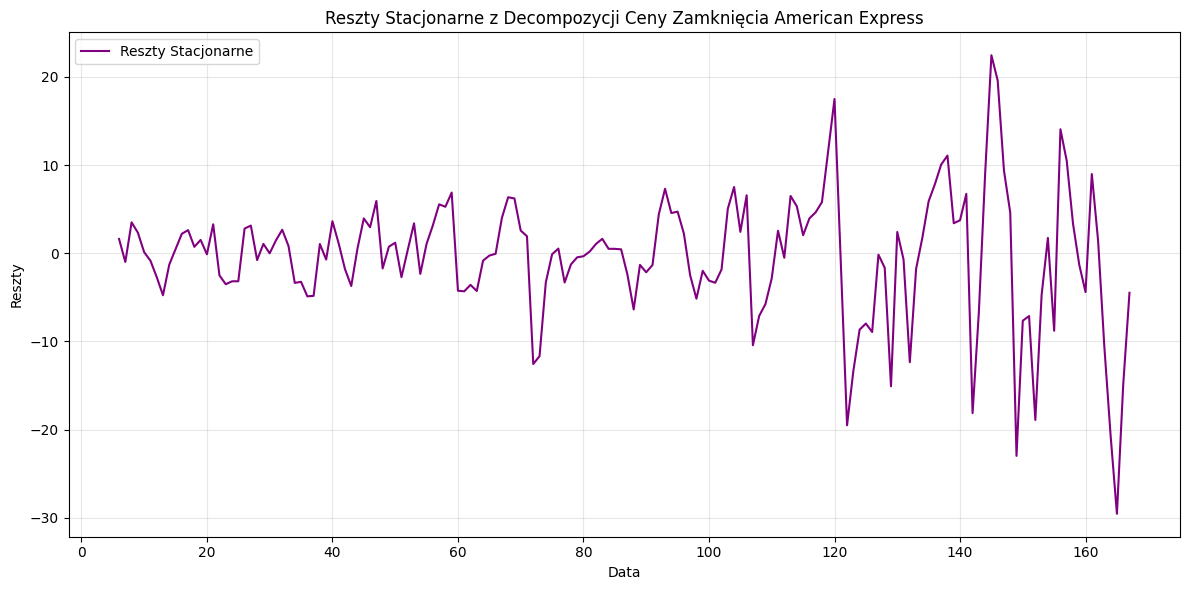

ADF TEST | American Express – Reszty Stacjonarne
Statystyka testowa: -4.3713
p-value:            0.0003
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4747
  5%: -2.8810
  10%: -2.5772




In [40]:
#Wykres AE + granger 
plt.figure(figsize=(12, 6))
plt.plot(residuals_ae.index, residuals_ae, label='Reszty Stacjonarne', color='purple')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia American Express')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(residuals_ae, "American Express – Reszty Stacjonarne")

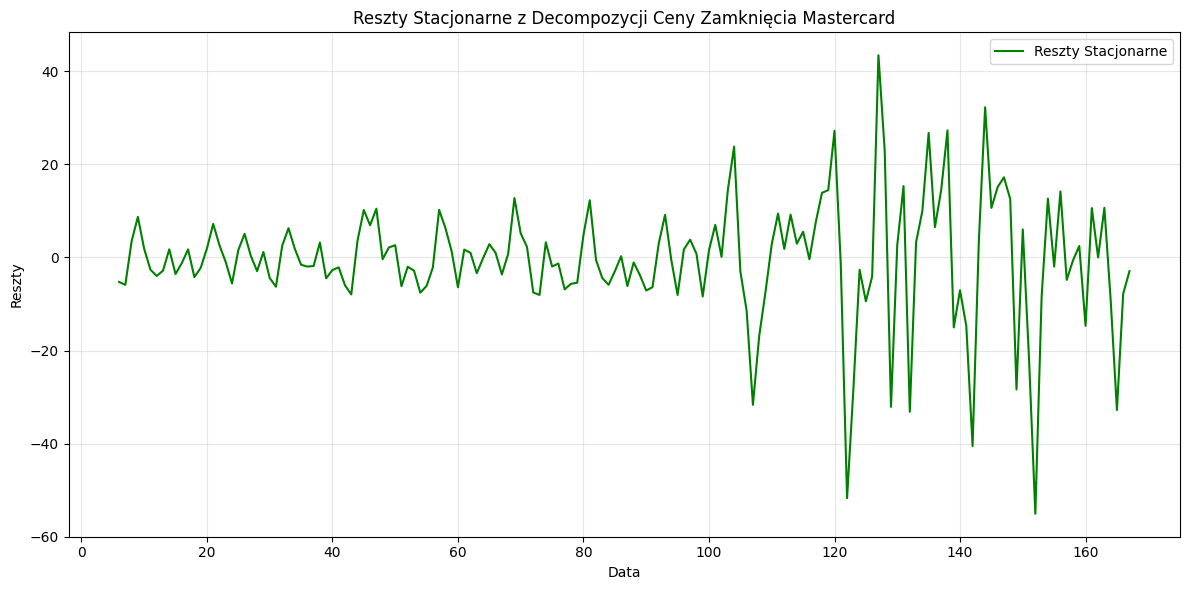

ADF TEST | Mastercard – Reszty Stacjonarne
Statystyka testowa: -3.8357
p-value:            0.0026
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4756
  5%: -2.8814
  10%: -2.5774




In [41]:
# Wykres M + granger
plt.figure(figsize=(12, 6))
plt.plot(residuals_m.index, residuals_m, label='Reszty Stacjonarne', color='green')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia Mastercard')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(residuals_m, "Mastercard – Reszty Stacjonarne")

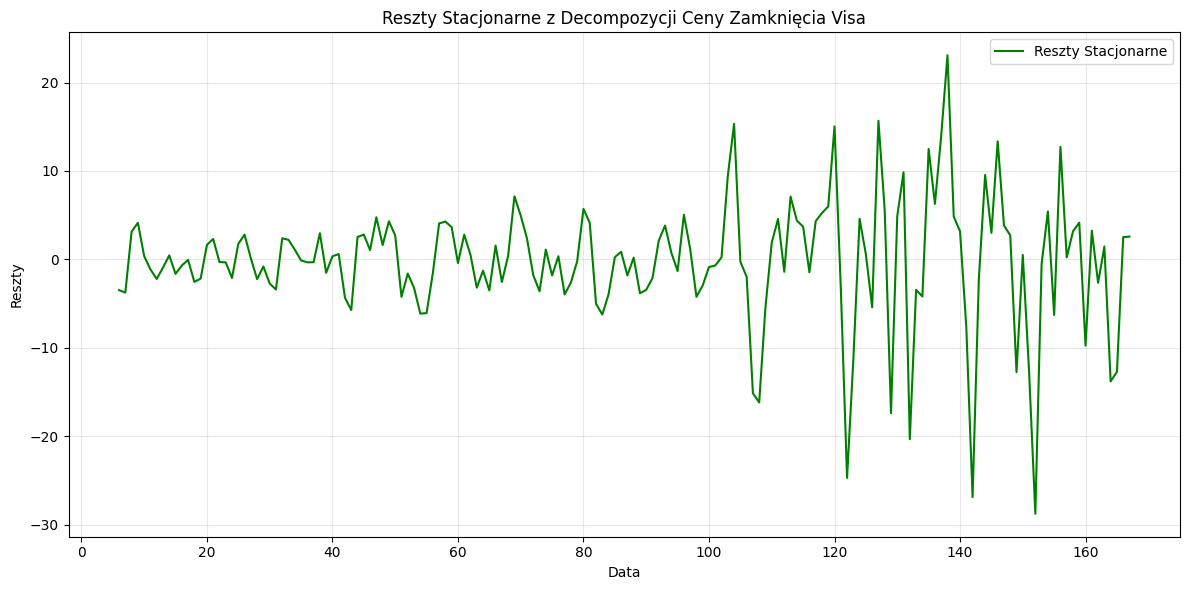

ADF TEST | Visa – Reszty Stacjonarne
Statystyka testowa: -3.5513
p-value:            0.0068
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4756
  5%: -2.8814
  10%: -2.5774




In [42]:
# Wykres V + granger
plt.figure(figsize=(12, 6))
plt.plot(residuals_v.index, residuals_v, label='Reszty Stacjonarne', color='green')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia Visa')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(residuals_v, "Visa – Reszty Stacjonarne")


## Aytokorelacja reszt 

In [43]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for residuals of American Express
dw_stat_ae = durbin_watson(residuals_ae)
print(f"Durbin-Watson statistic for American Express residuals: {dw_stat_ae:.4f}")

# Durbin-Watson test for residuals of Mastercard
dw_stat_m = durbin_watson(residuals_m)
print(f"Durbin-Watson statistic for Mastercard residuals: {dw_stat_m:.4f}")

# Durbin-Watson test for residuals of Visa
dw_stat_v = durbin_watson(residuals_v)
print(f"Durbin-Watson statistic for Visa residuals: {dw_stat_v:.4f}")

Durbin-Watson statistic for American Express residuals: 0.9217
Durbin-Watson statistic for Mastercard residuals: 1.4498
Durbin-Watson statistic for Visa residuals: 1.4494


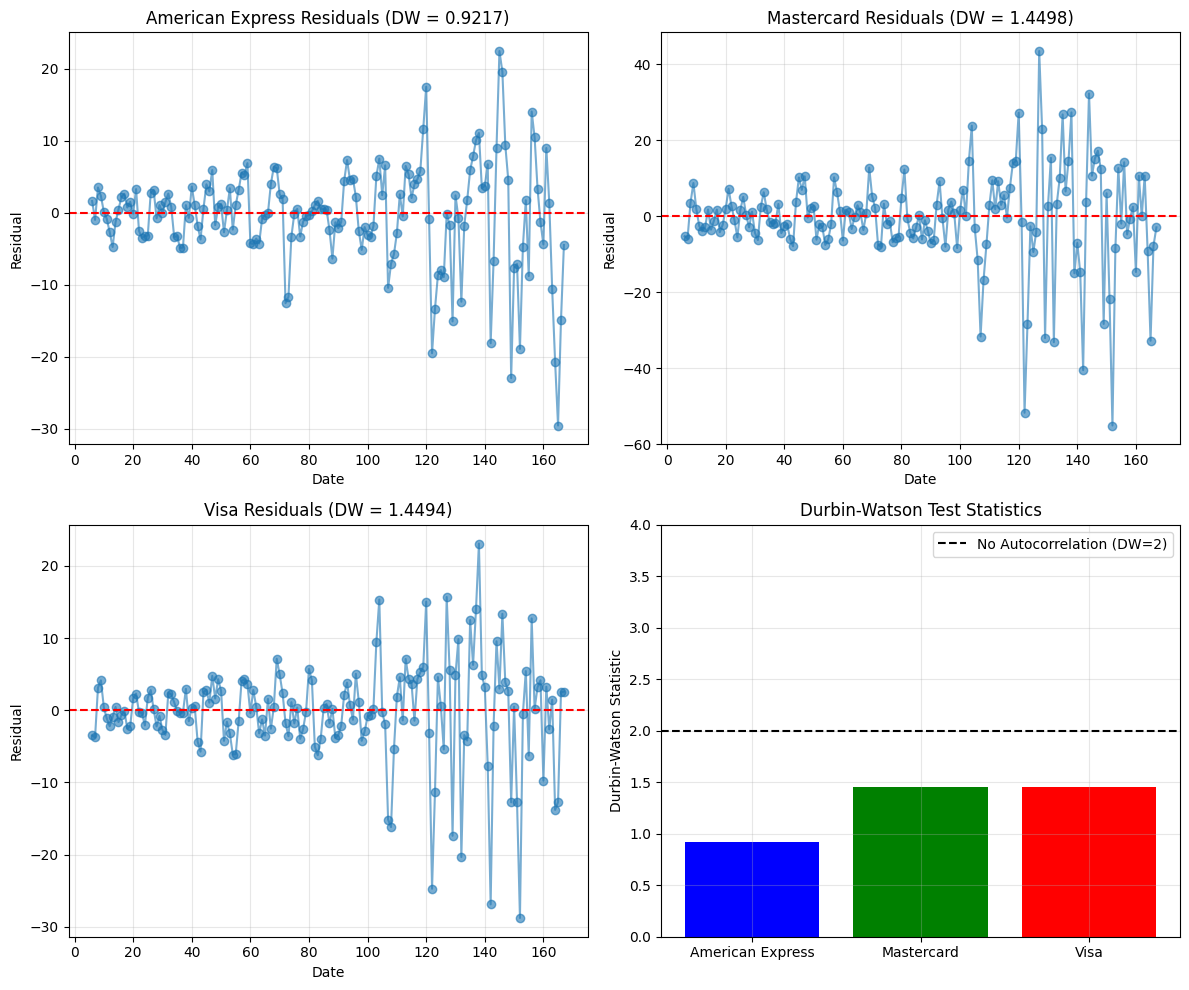

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals over time for American Express
axes[0, 0].plot(residuals_ae.index, residuals_ae, marker='o', linestyle='-', alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residual')
axes[0, 0].set_title(f'American Express Residuals (DW = {dw_stat_ae:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals over time for Mastercard
axes[0, 1].plot(residuals_m.index, residuals_m, marker='o', linestyle='-', alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].set_title(f'Mastercard Residuals (DW = {dw_stat_m:.4f})')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals over time for Visa
axes[1, 0].plot(residuals_v.index, residuals_v, marker='o', linestyle='-', alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Residual')
axes[1, 0].set_title(f'Visa Residuals (DW = {dw_stat_v:.4f})')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar chart for Durbin-Watson stats
dw_stats = {
    'American Express': dw_stat_ae,
    'Mastercard': dw_stat_m,
    'Visa': dw_stat_v
}
axes[1, 1].bar(dw_stats.keys(), dw_stats.values(), color=['blue', 'green', 'red'])
axes[1, 1].axhline(y=2, color='black', linestyle='--', label='No Autocorrelation (DW=2)')
axes[1, 1].set_ylabel('Durbin-Watson Statistic')
axes[1, 1].set_ylim(0, 4)
axes[1, 1].set_title('Durbin-Watson Test Statistics')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

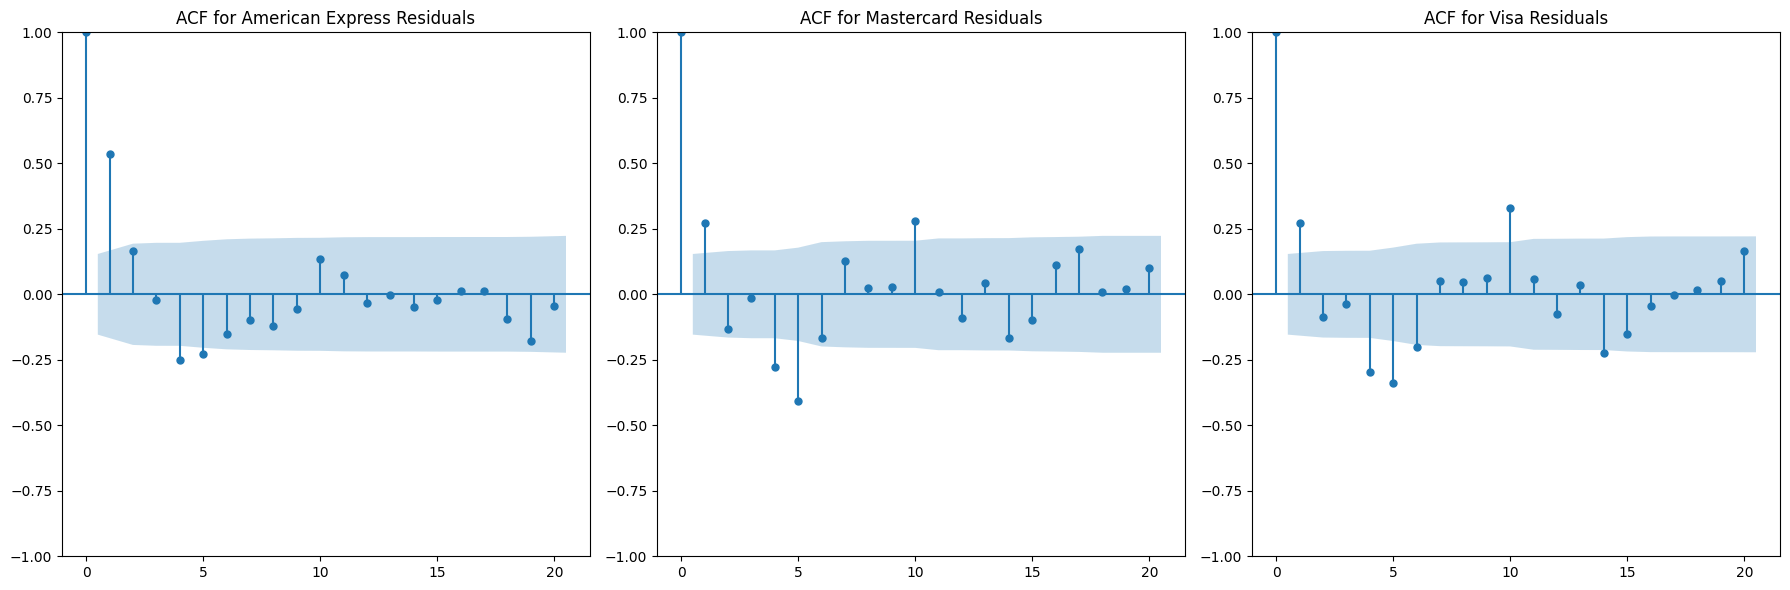

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_acf(residuals_ae, lags=20, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF for American Express Residuals')

plot_acf(residuals_m, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF for Mastercard Residuals')

plot_acf(residuals_v, lags=20, ax=axes[2], alpha=0.05)
axes[2].set_title('ACF for Visa Residuals')

plt.tight_layout()
plt.savefig('acf_residuals.png', dpi=100, bbox_inches='tight')
plt.show()

## VAR

In [46]:
# Przygotowanie danych do modelu VAR
df_res = pd.concat([residuals_ae, residuals_m, residuals_v], axis=1)
df_res.columns = ['Resid_AE', 'Resid_M', 'Resid_V']
daty = pd.to_datetime(df_monthly['Date']).values


In [47]:
# Obliczanie metryk
# Odcinamy ostatnie 12 miesięcy do testu
test_size = 12
train_res = df_res.iloc[:-test_size]
test_res = df_res.iloc[-test_size:]

# Dopasowanie modelu na danych treningowych
model_eval = VAR(train_res)
best_lag = model_eval.select_order(maxlags=12).aic
results_eval = model_eval.fit(best_lag)

# Prognoza testowa
forecast_test_raw = results_eval.forecast(train_res.values[-results_eval.k_ar:], steps=test_size)

print("METRYKI EVALUACJI MODELU (na resztach)")
metrics_list = []
for i, col in enumerate(df_res.columns):
    actual = test_res.iloc[:, i]
    pred = forecast_test_raw[:, i]
    
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Ticker': col, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

df_metrics = pd.DataFrame(metrics_list).set_index('Ticker')
print(df_metrics.round(4))

METRYKI EVALUACJI MODELU (na resztach)
              MAE       MSE     RMSE
Ticker                              
Resid_AE  11.0515  206.1883  14.3593
Resid_M   14.0179  329.8502  18.1618
Resid_V    7.6279  106.4828  10.3190


In [48]:
# Dopasowanie ostatecznego modelu VAR na pełnym zbiorze danych
model_final = VAR(df_res)
results_var = model_final.fit(best_lag) # używamy laga z AIC

steps = 24
forecast_res_raw = results_var.forecast(df_res.values[-results_var.k_ar:], steps=steps)
df_forecast_res = pd.DataFrame(forecast_res_raw, columns=['Resid_AE', 'Resid_M', 'Resid_V'])

# Przygotowanie miesięcy dla sezonowości
ostatnia_data = pd.to_datetime(df_monthly['Date']).iloc[-1]
future_months = [(ostatnia_data.month + i) % 12 for i in range(1, steps + 1)]
future_months = [m if m != 0 else 12 for m in future_months]

Rekompozycja

In [49]:
def recompose_price(result_decomp, residuals_column):
    last_trend = result_decomp.trend.dropna().iloc[-1]
    trend_slope = result_decomp.trend.diff().mean()
    
    # Mapa sezonowości
    s_series = pd.Series(result_decomp.seasonal.values, index=pd.to_datetime(df_monthly['Date']))
    s_map = s_series.groupby(s_series.index.month).first()
    
    prices = []
    for i in range(steps):
        f_trend = last_trend + (trend_slope * (i + 1))
        f_season = s_map[future_months[i]]
        f_resid = df_forecast_res[residuals_column].iloc[i]
        prices.append(f_trend + f_season + f_resid)
    return prices

Wyniki

In [50]:
final_forecasts = pd.DataFrame({
    'Month_Ahead': range(1, steps + 1),
    'Forecast_AE': recompose_price(result_ae, 'Resid_AE'),
    'Forecast_M': recompose_price(result_m, 'Resid_M'),
    'Forecast_V': recompose_price(results_v, 'Resid_V')
})

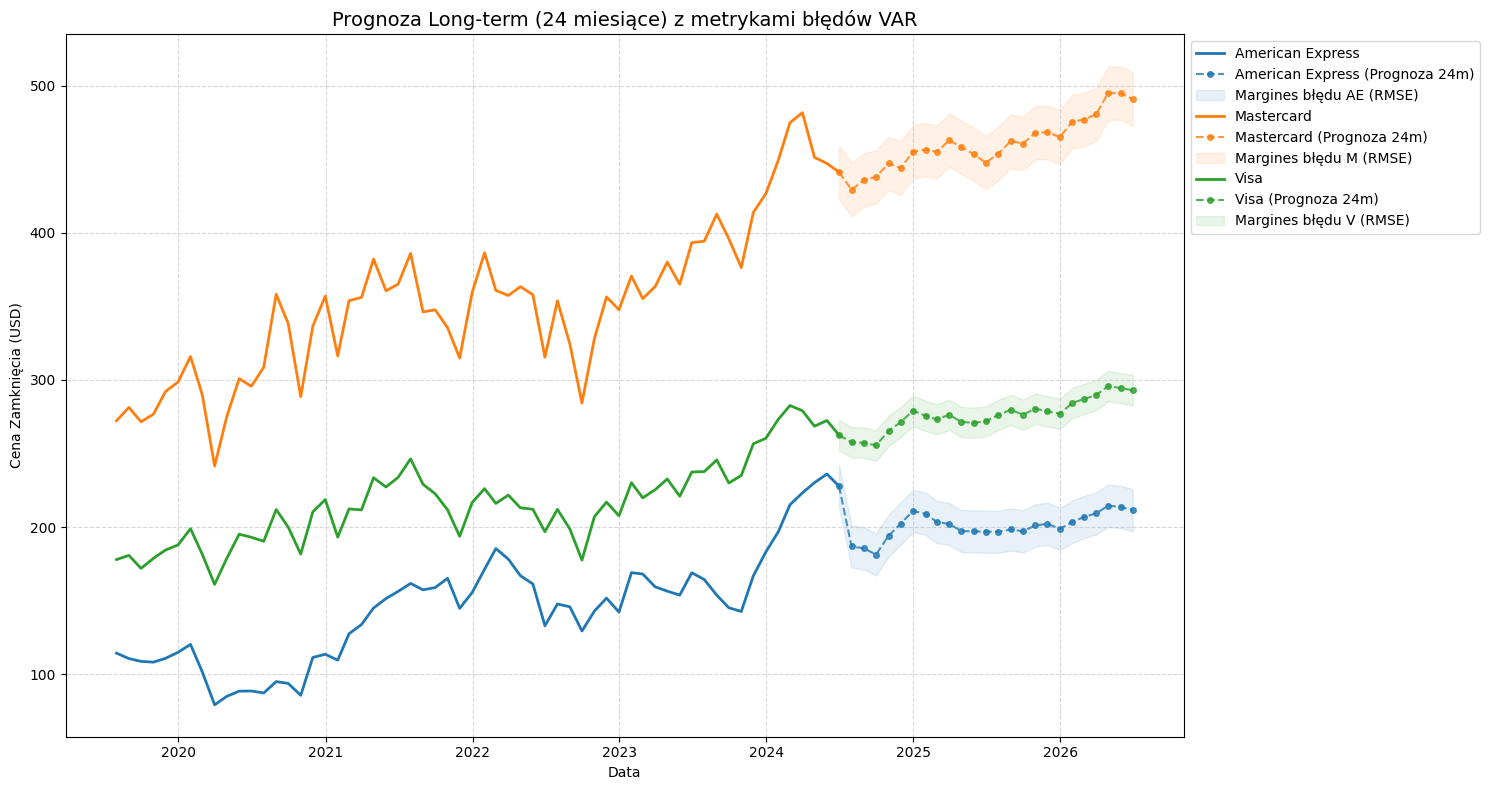

Tabela prognoz (pierwsze 6 miesięcy):
   Month_Ahead  Forecast_AE  Forecast_M  Forecast_V
0            1       186.97      429.22      257.66
1            2       185.56      435.88      257.33
2            3       181.42      437.96      255.53
3            4       194.12      447.11      265.31
4            5       202.36      443.88      271.35
5            6       210.99      455.06      279.09


In [51]:
last_date = pd.to_datetime(df_monthly['Date']).iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='ME')

plt.figure(figsize=(15, 8))
history_view = df_monthly.tail(60) # Ostatnie 5 lat dla kontekstu
h_dates = pd.to_datetime(history_view['Date'])

colors = {'AE': '#1f77b4', 'M': '#ff7f0e', 'V': '#2ca02c'}

for ticker, col_hist, col_fore, label in [
    ('AE', 'Close_AE', 'Forecast_AE', 'American Express'),
    ('M', 'Close_M', 'Forecast_M', 'Mastercard'),
    ('V', 'Close_V', 'Forecast_V', 'Visa')
]:
    # Historia
    plt.plot(h_dates, history_view[col_hist], color=colors[ticker], label=f'{label}', linewidth=2)
    
    # Prognoza
    full_f_dates = [h_dates.iloc[-1]] + list(forecast_dates)
    full_f_values = [history_view[col_hist].iloc[-1]] + list(final_forecasts[col_fore])
    rmse_val = df_metrics.loc[f'Resid_{ticker}', 'RMSE']
    lower_bound = [v - rmse_val for v in full_f_values]
    upper_bound = [v + rmse_val for v in full_f_values]
    plt.plot(full_f_dates, full_f_values, color=colors[ticker], linestyle='--', marker='o', markersize=4, alpha=0.8, label=f'{label} (Prognoza 24m)')
    plt.fill_between(full_f_dates, lower_bound, upper_bound, 
                 color=colors[ticker], alpha=0.1, label=f'Margines błędu {ticker} (RMSE)')
plt.title('Prognoza Long-term (24 miesiące) z metrykami błędów VAR', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Cena Zamknięcia (USD)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

print("Tabela prognoz (pierwsze 6 miesięcy):")
print(final_forecasts.head(6).round(2))

## IRF

In [ ]:
# 1. Obliczamy IRF dla 10 okresów w przód
irf = results_var.irf(10)

# 2. Rysujemy wykresy odpowiedzi na impuls
# orth=True oznacza ortogonalizację (rozkład Cholesky'ego), 
# co pozwala wyizolować wpływ konkretnej zmiennej.
fig = irf.plot(orth=True, figsize=(12, 10))

plt.suptitle("Analiza IRF - Reakcja reszt na szoki cenowe", fontsize=16, y=1.02)
plt.tight_layout()
plt.xlabel('Lagi (miesiące)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

Co jeśli wykonamy to samo dla tych American Express do 2025 roku

In [ ]:
df_2_monthly = df_2.set_index('Date').resample('ME').last().reset_index()
df_2_monthly.head()
df_2_monthly.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
187,2025-08-31,326.452828,331.220746,325.984015,330.442719,2981300,0.0,0.0,0.013120,9.150143,309.632670,292.912092
188,2025-09-30,340.736639,342.093187,327.320621,331.320496,3327300,0.0,0.0,-0.029651,9.177106,317.380216,296.977684
189,2025-10-31,357.000000,361.989990,356.000000,360.730011,2155600,0.0,0.0,0.005155,10.080472,334.792163,301.978228
190,2025-11-30,365.690002,367.529999,364.010010,365.269989,872300,0.0,0.0,0.003572,10.219926,347.469955,306.295450
191,2025-12-31,386.489990,387.489990,378.640015,382.559998,2445474,0.0,0.0,-0.006054,10.751019,354.049380,309.821795


In [ ]:
df_2_monthly = df_2_monthly[['Date', 'Close']]
df_2_monthly.info()
df_2_monthly.tail()


<class 'pandas.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    192 non-null    datetime64[us]
 1   Close   192 non-null    float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 3.1 KB


,Date,Close
187,2025-08-31,330.442719
188,2025-09-30,331.320496
189,2025-10-31,360.730011
190,2025-11-30,365.269989
191,2025-12-31,382.559998


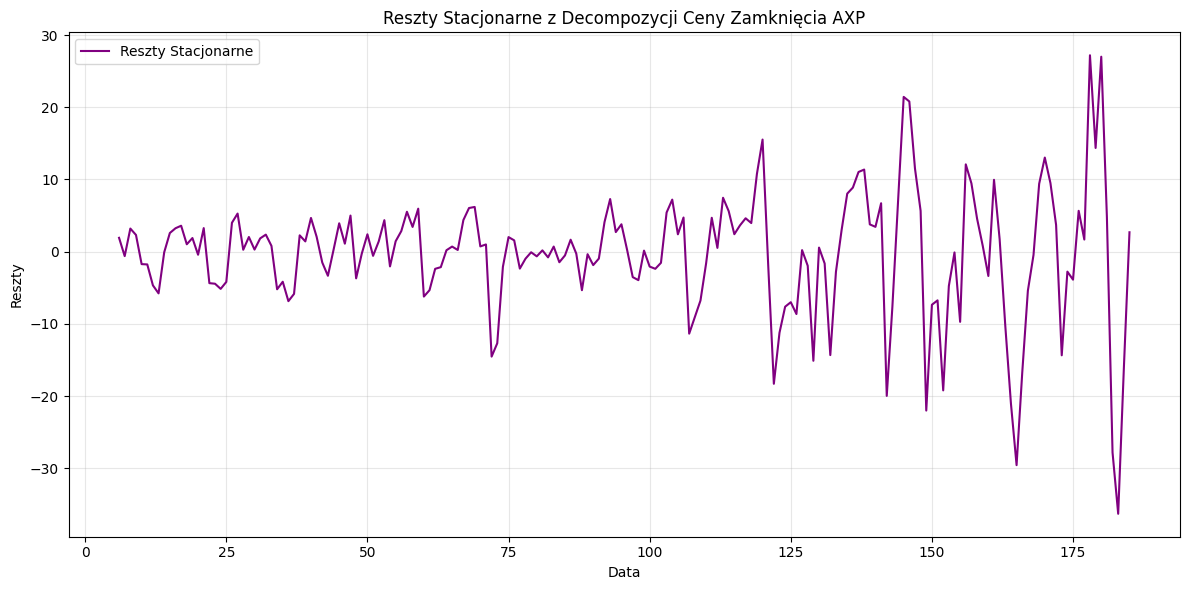

ADF TEST | AXP – Reszty Stacjonarne
Statystyka testowa: -5.2969
p-value:            0.0000
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4699
  5%: -2.8789
  10%: -2.5760




In [ ]:
# dekompozycja sezonowa
from statsmodels.tsa.seasonal import seasonal_decompose
result_2 = seasonal_decompose(df_2_monthly['Close'], model='additive', period=12)
residuals_2 = result_2.resid.dropna()

#Wykres AE + granger
plt.figure(figsize=(12, 6))
plt.plot(residuals_2.index, residuals_2, label='Reszty Stacjonarne', color='purple')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia AXP')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
adf_test(residuals_2, "AXP – Reszty Stacjonarne")


## Var dla American Express - aktualny

<module 'matplotlib.pyplot' from '/home/karol/Projekt_analiza_danych /venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

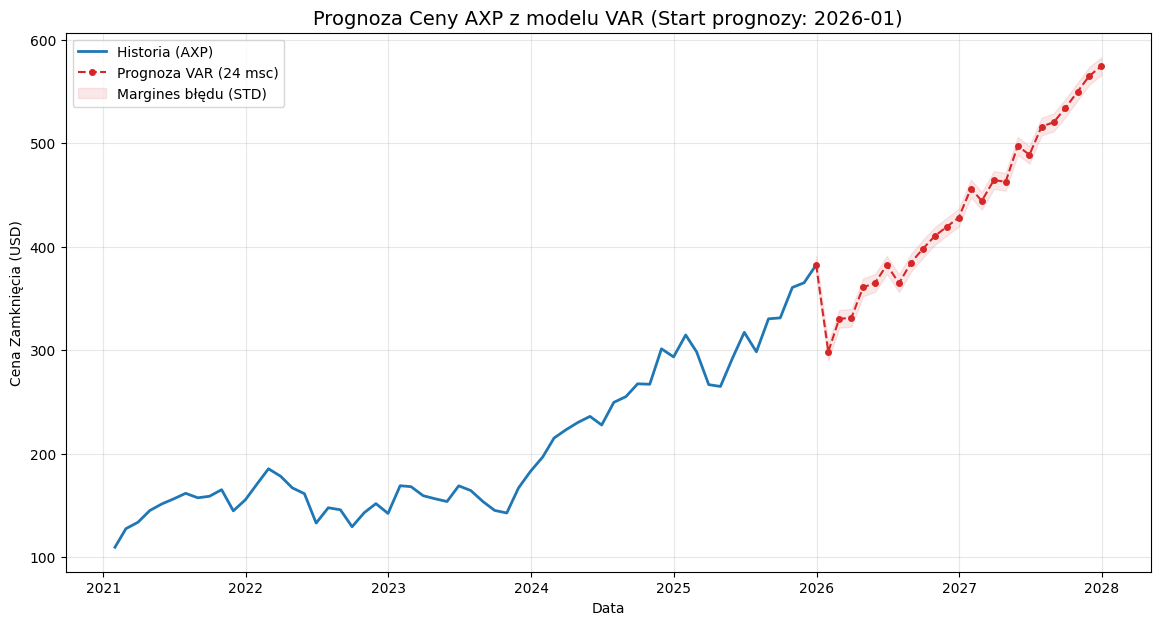

In [ ]:
# --- 1. PRZYGOTOWANIE DANYCH (Naprawa indeksów) ---

# Pobieramy komponenty, ale musimy pamiętać, że mają one indeksy liczbowe (0,1,2...)
# Musimy przypisać im właściwe daty z df_2_monthly
df_components = pd.DataFrame({
    'trend': result_2.trend,
    'seasonal': result_2.seasonal,
    'resid': result_2.resid
}).dropna()

# Mapujemy indeksy liczbowe na prawdziwe daty
df_components.index = df_2_monthly.loc[df_components.index, 'Date']

# --- 2. MODELOWANIE VAR ---

# Trenujemy model na dostępnych (uciętych przez dekompozycję) danych
model = VAR(df_components)
results = model.fit(maxlags=12) # Automatyczny dobór parametrów

# --- 3. PROGNOZOWANIE (Fix daty startowej) ---

steps = 24  # Prognoza na 2 lata
lag_order = results.k_ar

# Generujemy liczby
forecast_values = results.forecast(df_components.values[-lag_order:], steps=steps)

# KLUCZOWE: Generujemy daty startując od PRAWDZIWEGO końca danych historycznych
real_last_date = df_2_monthly['Date'].max()
forecast_dates = pd.date_range(start=real_last_date + pd.DateOffset(months=1), 
                               periods=steps, freq='ME')

# Tworzymy DataFrame z wynikami
df_forecast = pd.DataFrame(forecast_values, index=forecast_dates, columns=['trend', 'seasonal', 'resid'])

# Rekonstrukcja ceny (Suma komponentów)
df_forecast['Predicted_Close'] = df_forecast.sum(axis=1)

# --- 4. WYKRES (Styl profesjonalny) ---

plt.figure(figsize=(14, 7))

# A. Dane historyczne
# Bierzemy ostatnie 5 lat dla kontekstu
history_view = df_2_monthly[df_2_monthly['Date'] > (real_last_date - pd.DateOffset(years=5))]
plt.plot(history_view['Date'], history_view['Close'], label='Historia (AXP)', color='#1f77b4', linewidth=2)

# B. Łączenie linii (żeby nie było dziury na wykresie)
last_hist_val = history_view['Close'].iloc[-1]
last_hist_date = history_view['Date'].iloc[-1]

plot_dates = [last_hist_date] + list(df_forecast.index)
plot_values = [last_hist_val] + list(df_forecast['Predicted_Close'])

# C. Rysowanie prognozy
plt.plot(plot_dates, plot_values, label='Prognoza VAR (24 msc)', color='#d62728', linestyle='--', marker='o', markersize=4)

# D. Obszar błędu (RMSE na podstawie reszt z modelu)
rmse = df_components['resid'].std()
lower_bound = [val - rmse for val in plot_values]
upper_bound = [val + rmse for val in plot_values]

plt.fill_between(plot_dates, lower_bound, upper_bound, color='#d62728', alpha=0.1, label='Margines błędu (STD)')

# Formatowanie
plt.title(f'Prognoza Ceny AXP z modelu VAR (Start prognozy: {forecast_dates[0].strftime("%Y-%m")})', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Cena Zamknięcia (USD)')
plt.grid(True, alpha=0.3)
plt.legend()
plt

In [ ]:
print(df_forecast)

                 trend  seasonal      resid  Predicted_Close
2026-01-31  320.745730  0.508756 -22.700959       298.553528
2026-02-28  326.425001 -1.223802   5.241520       330.442719
2026-03-31  335.488458 -3.655291  -0.512671       331.320496
2026-04-30  347.016874 -3.350921  17.064058       360.730011
2026-05-31  358.358306  1.563233   5.348450       365.269989
2026-06-30  368.258721  0.508807  13.792470       382.559998
2026-07-31  379.454042  3.283932 -17.937221       364.800753
2026-08-31  390.778130  3.980245  -9.998948       384.759427
2026-09-30  401.079324 -0.865424  -2.189431       398.024470
2026-10-31  410.885606 -0.675088   0.322828       410.533346
2026-11-30  420.651605  0.198896  -1.553855       419.296646
2026-12-31  430.595844 -0.273343  -2.068489       428.254013
2027-01-31  441.337697  0.508756  14.513296       456.359749
2027-02-28  453.298769 -1.223802  -7.660356       444.414612
2027-03-31  464.622253 -3.655291   3.610305       464.577266
2027-04-30  476.101028 -